In [19]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from keras.datasets.mnist import load_data
from scipy.ndimage import rotate

# Carico i dataset

In [25]:
(X,_),(__,___) = load_data()
# standardizzo
X = jax.vmap(
    lambda x:
        (x - x.min())/(x.max() - x.min())
)(X)

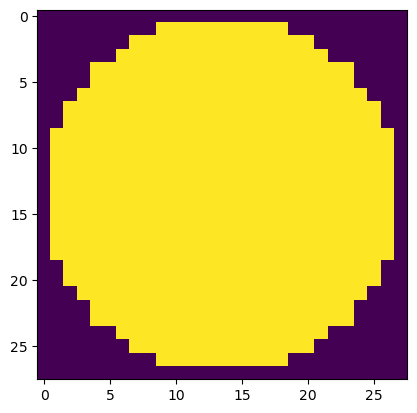

In [26]:
emptyball = jnp.array([
    [
            x**2 + y**2 < 1
        for y in np.linspace(-1,1,28)
    ]
    for x in np.linspace(-1,1,28)
])
plt.imshow(emptyball)

In [27]:
X = jax.vmap(
    lambda x:
    x * emptyball
)(X)

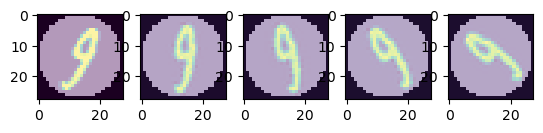

In [28]:
axs = plt.figure().subplots(nrows = 1,ncols = 5)
for i,a in enumerate(axs):
    angolo = 20 * i
    a.imshow( rotate( X[52232], angolo,reshape = False ) )
    a.imshow(emptyball, alpha = 0.6, cmap = 'gray')

# Procedura

# $\text{griglia} \mapsto \text{nuvola di punti}$

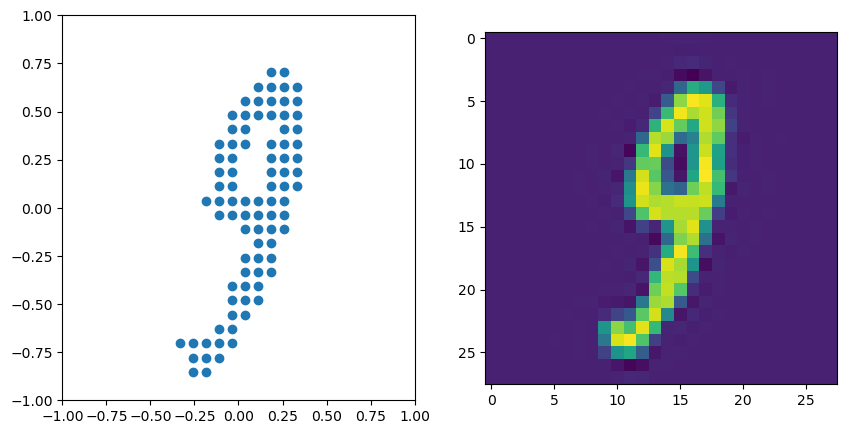

In [96]:
def getCloudOfPoints(X):
    grid = jnp.array([
        [
                   [y,x]
            for y in np.linspace(-1,1,28)
        ]
        for x in np.linspace(-1,1,28)[-1::-1]
    ])
    return grid[X > 0.5]

sample = rotate(X[52232],10,reshape = False)
P = getCloudOfPoints(sample)
axs = plt.figure(figsize = (10,5)).subplots(nrows = 1, ncols = 2).flatten()
axs[0].set_xlim(-1,1)
axs[0].set_ylim(-1,1)
axs[0].scatter(P[:,0], P[:,1])
axs[1].imshow(sample)

## calcolo componenti principali

In [97]:
P[np.abs(P).argmax(axis = 0),[0,1]]

DeviceArray([ 0.33333334, -0.8518519 ], dtype=float32)

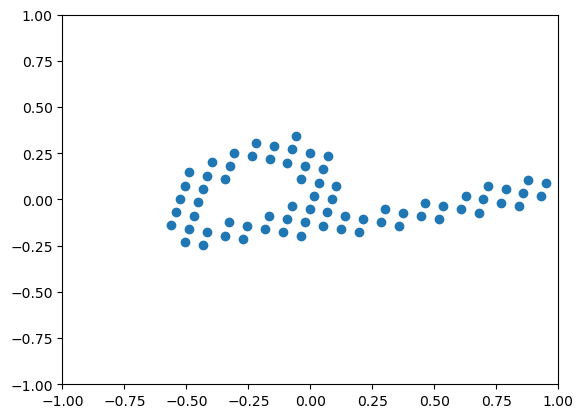

In [107]:
P = getCloudOfPoints(sample)
mu = P.mean(axis = 0)
P = P - P.mean(axis = 0)
U,s,Vt = np.linalg.svd(P, full_matrices = False)
P = P @ Vt.T
P = P * np.sign(P[np.argmax(np.abs(P),axis = 0),[0,1]])[None,:]
P = P + mu
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(P[:,0],P[:,1])


# $\text{nuvola di punti } \mapsto \text{ griglia }$

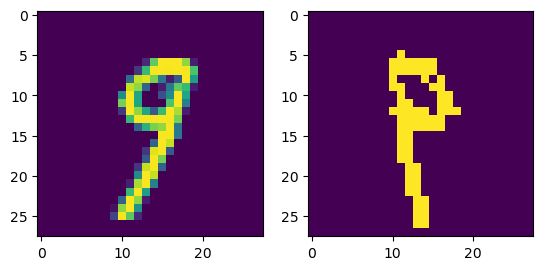

In [108]:
ret = np.zeros((28,28))
for p in P:
    i = int(13.5 * p[0] + 13.5)
    j = int(13.5 * p[1] + 13.5)
    ret[i,j] = 1
axs = plt.figure().subplots(nrows = 1, ncols = 2).flatten()
axs[0].imshow(sample)
axs[1].imshow(ret)

# Funzione

In [109]:
def rotational_invariant_grid(x):
    # conversione in nuvola di punti
    P = getCloudOfPoints(x)
    
    # proiezione su componenti principali stabilizzate
    mu = P.mean(axis = 0)
    P = P - mu
    U,s,Vt = np.linalg.svd(P, full_matrices = False)
    P = P @ Vt.T
    segni = np.sign(P[np.argmax(np.abs(P),axis = 0),[0,1]])
    P = P * segni[None,:]
    P = P + (mu @ Vt.T)*segni[None,:]
    # riconversione in griglia
    ret = np.zeros((28,28))
    for p in P:
        i = int(13.5 * p[0] + 13.5)
        j = int(13.5 * p[1] + 13.5)
        ret[i,j] = 1
    return ret

11299


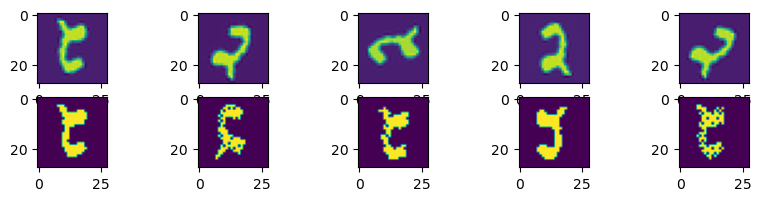

In [134]:
indice = np.random.choice(len(X))
print(indice)
sample = X[indice]
axs    = plt.figure(figsize = (10,2)).subplots(nrows = 2, ncols = 5)
for i in range((axs.shape[1])):
    sample_rotated = rotate(sample, np.random.uniform() * 360, reshape = False)
    invariante     = rotational_invariant_grid(sample_rotated)
    axs[0,i].imshow(sample_rotated)
    axs[1,i].imshow(invariante)

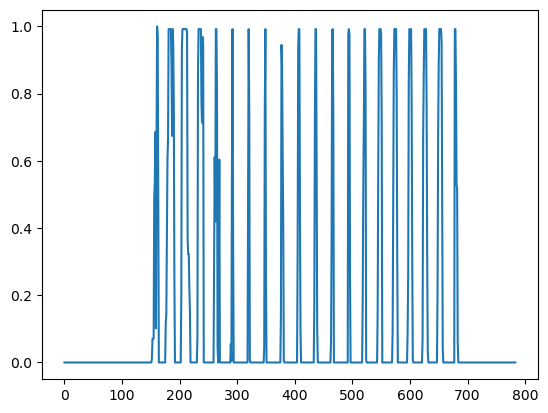